In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import plotly.express as px
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv("C:/Users/rosyi/Desktop/Data Coding/TSLA.csv")
df.shape

(639, 7)

In [5]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,639.000000,639.000000,639.000000,639.000000,6.390000e+02,639.000000
mean,543.362885,517.883537,531.004088,531.298030,4.819130e+07,531.298030
std,340.837426,325.395864,333.534448,333.362040,3.579030e+07,333.362040
min,46.896000,44.855999,45.959999,46.285999,9.800600e+06,46.285999
25%,170.258003,162.379997,167.349998,164.783005,2.392195e+07,164.783005
50%,620.409973,595.500000,603.880005,605.130005,3.448900e+07,605.130005
75%,796.584991,767.744995,779.445007,781.304993,6.329725e+07,781.304993
max,1243.489990,1217.000000,1234.410034,1229.910034,3.046940e+08,1229.910034


In [3]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


In [52]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
634,2022-04-05,1152.869995,1087.300049,1136.300049,1091.260010,26691700.0,1091.260010
635,2022-04-06,1079.000000,1027.699951,1073.469971,1045.760010,29782800.0,1045.760010
636,2022-04-07,1076.589966,1021.539978,1052.390015,1057.260010,26482400.0,1057.260010
637,2022-04-08,1048.439941,1022.440002,1043.209961,1025.489990,18293300.0,1025.489990
638,2022-04-11,1008.469971,974.640015,980.400024,975.929993,19660500.0,975.929993


In [53]:
#Change type the data of date
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace = True)# Set the date to be the index

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 639 entries, 2019-09-30 to 2022-04-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       639 non-null    float64
 1   Low        639 non-null    float64
 2   Open       639 non-null    float64
 3   Close      639 non-null    float64
 4   Volume     639 non-null    float64
 5   Adj Close  639 non-null    float64
dtypes: float64(6)
memory usage: 34.9 KB


<AxesSubplot:xlabel='Date'>

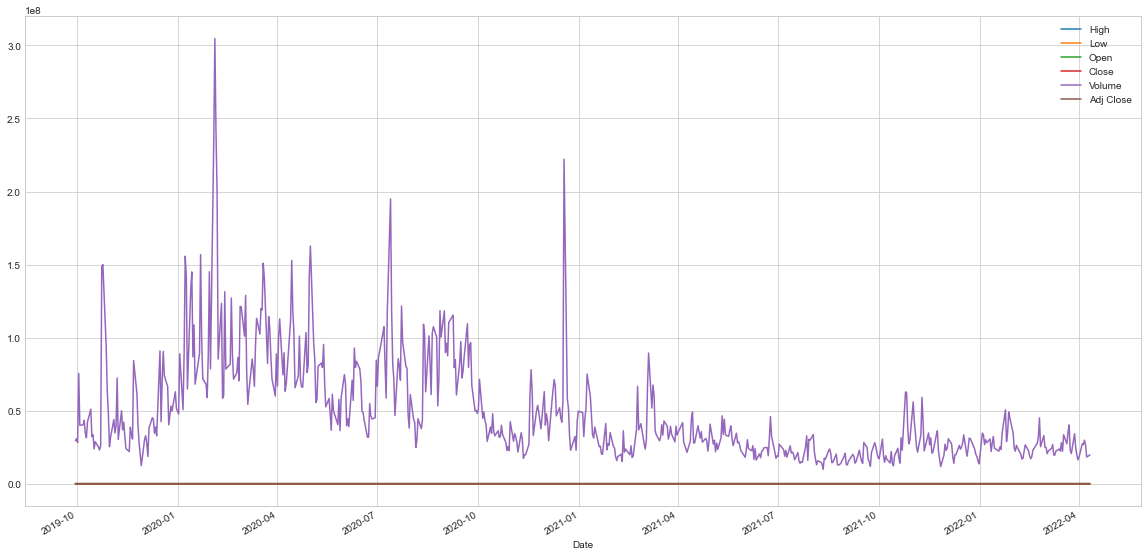

In [55]:
#Plot Data
df.plot(figsize = (20,10))

Text(0.5, 1.0, 'TSLA Stock Graph')

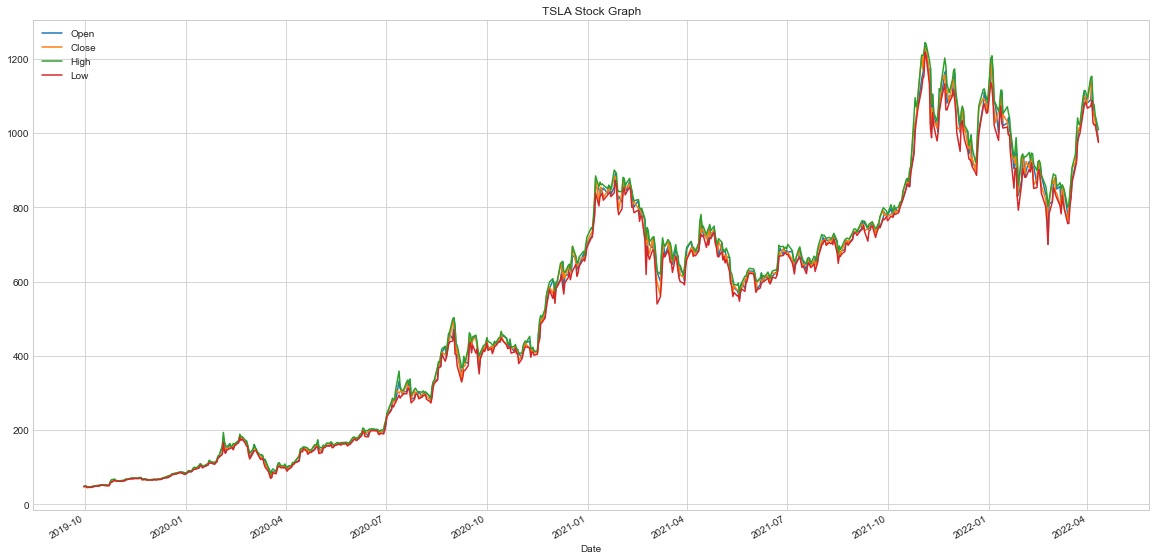

In [56]:
df[['Open','Close','High','Low']].plot(figsize = (20,10))
plt.title('TSLA Stock Graph')

Text(0.5, 1.0, 'TSLA Stock Volume')

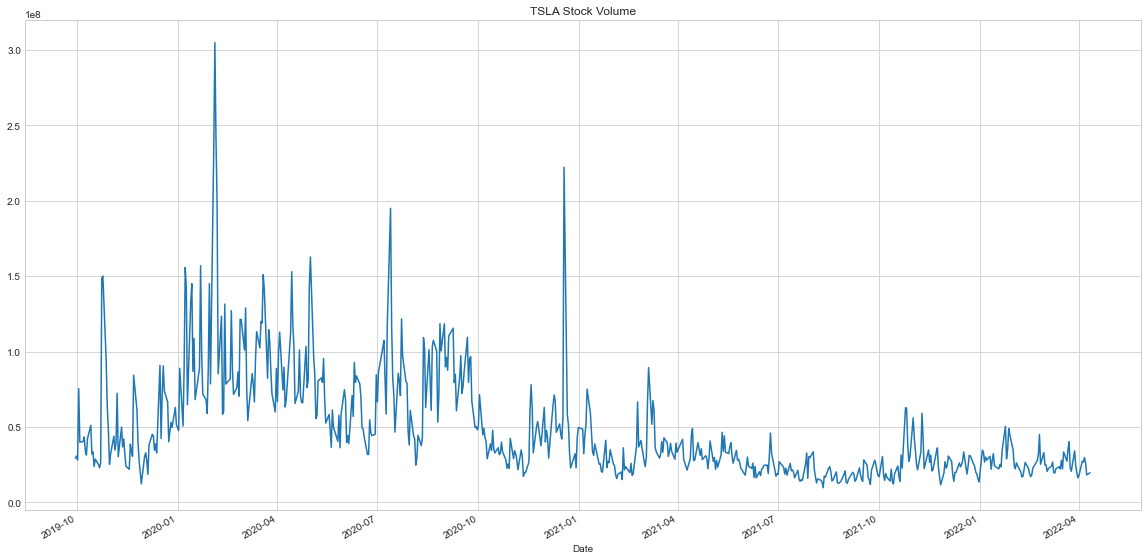

In [57]:
df['Volume'].plot(figsize = (20,10))
plt.title('TSLA Stock Volume')

<AxesSubplot:>

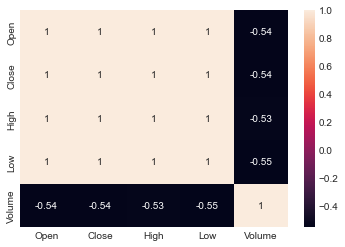

In [58]:
# Korelasi antara Volume dengan harga TSLA
corr = df[['Open','Close','High','Low','Volume']]
corr.corr()
sns.heatmap(corr.corr(), annot = True)

In [59]:
# When the test statistic is lower than the critical value shown, 
# you reject the null hypothesis and infer that the time series is stationary.

In [67]:
from statsmodels.tsa.stattools import adfuller
series = df['Close']
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.017117277518048
n_lags: 0.7469700840885273
p-value: 0.7469700840885273
Critial Values:
   1%, -3.440641231176813
Critial Values:
   5%, -2.8660808067889976
Critial Values:
   10%, -2.569188186240308


In [71]:
adf_diff = df['Close'].resample('MS').mean() - df['Close'].resample('MS').mean().shift(1)
adf_close_diff = series.dropna()

In [72]:
result = adfuller(adf_close_diff, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.47593136794214
n_lags: 0.00021729756316718292
p-value: 0.00021729756316718292
Critial Values:
   1%, -3.6699197407407405
Critial Values:
   5%, -2.9640707407407407
Critial Values:
   10%, -2.621171111111111


In [73]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)
kpss_test(df['Close'])

Results of KPSS Test:
Test Statistic            3.550389
p-value                   0.010000
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\rosyi\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


<AxesSubplot:xlabel='Date'>

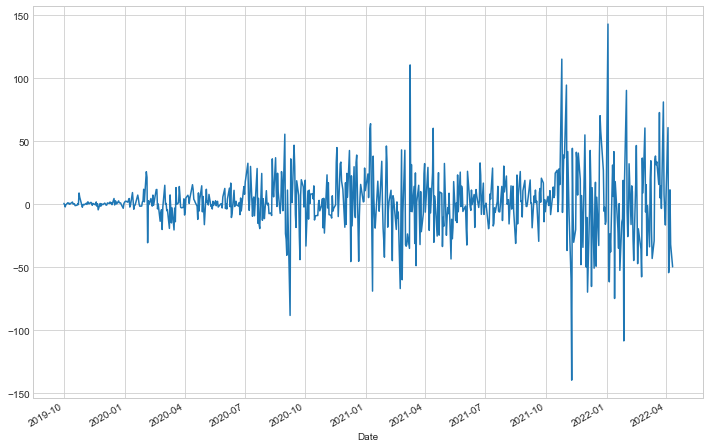

In [80]:
df['close_diff'] = df['Close'] - df['Close'].shift(1)
df['close_diff'].dropna().plot(figsize = (12,8))

In [83]:
kpss_test(df['close_diff'].dropna())

Results of KPSS Test:
Test Statistic           0.039283
p-value                  0.100000
Lags Used                3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\rosyi\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [84]:
kpss_test(df['close_diff'].resample('MS').mean().dropna())

Results of KPSS Test:
Test Statistic           0.163477
p-value                  0.100000
Lags Used                3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\rosyi\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [85]:
adf_test(df['close_diff'].dropna())

NameError: name 'adf_test' is not defined